In [52]:
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_context("notebook", font_scale=1.5)

file = 'https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Sternberg/2021/Sternberg_cleaned.csv'

data = pd.read_csv(file)


In [53]:
data.head()

,setSize,present,id,rt
0,1,n,1,407.000000
1,1,n,2,848.500000
2,1,n,3,549.333333
3,1,n,4,982.333333
4,1,n,5,568.000000


In [74]:
df_p = data[data['present'] == "y"]
df_n = data[data['present'] == "n"]

df = pd.DataFrame({'present': df_p.groupby('id').mean()['rt'],
                  'not_present': df_n.groupby('id').mean()['rt']})

df.head()

,present,not_present
id,,
1,508.923791,531.404528
2,932.158333,983.713500
3,625.247421,634.329594
4,973.936329,880.637294
5,634.115741,672.302941


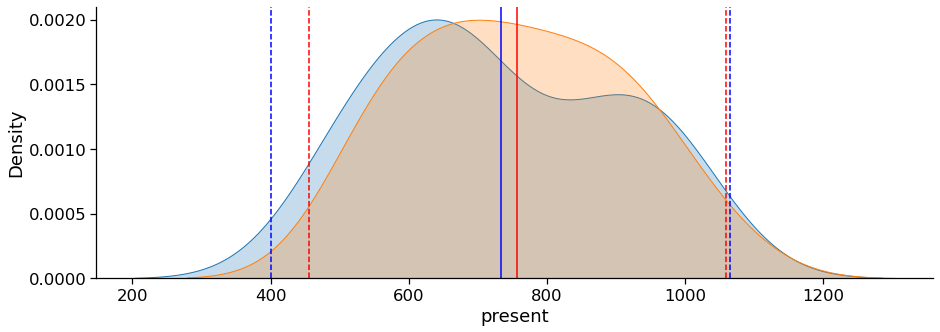

In [75]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.kdeplot(data = df['present'], ax=ax, fill=True, label='present')
sns.kdeplot(data = df['not_present'], ax=ax, fill=True, label='not present')

plt.axvline(np.mean(df['present']), color = 'blue')
plt.axvline(np.mean(df['not_present']), color = 'red')


plt.axvline(np.mean(df['present'])-(np.std(df['present'])*2), color = 'blue', linestyle = '--')
plt.axvline(np.mean(df['present'])+(np.std(df['present'])*2), color = 'blue', linestyle = '--')

plt.axvline(np.mean(df['not_present'])-(np.std(df['not_present'])*2), color = 'red', linestyle = '--')
plt.axvline(np.mean(df['not_present'])+(np.std(df['not_present'])*2), color = 'red', linestyle = '--')


sns.despine()

In [76]:
pg.ttest(df['present'], df['not_present'], paired = True, alternative = 'two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.957664,20,two-sided,0.06437,"[-50.38, 1.6]",0.149927,1.122,0.100349


<AxesSubplot:>

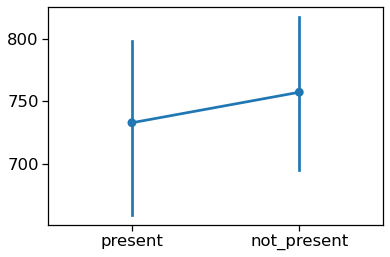

In [77]:
sns.pointplot(data = df)